<a href="https://colab.research.google.com/github/sonovman/GNN-from-scratch/blob/main/Part1_GNN_cora_dataset_Study_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이토치 데이터세트 샘플 설명
https://baeseongsu.github.io/posts/pytorch-geometric-introduction/

파이토치(PYTORCH) 한국어 튜토리얼
https://tutorials.pytorch.kr/

In [ ]:
!python -c "import torch; print(torch.version.cuda)"

In [ ]:
# PyTorch version
!python -c "import torch; print(torch.__version__)"  #install 패키지 버전를 맞추기 위해서...

In [ ]:
#https://pytorch-geometric.readthedocs.io/en/latest/

In [ ]:
#https://github.com/pyg-team/pytorch_geometric

In [ ]:
# Pytorch 버전에 맞추어 패키지 버전 install

!pip install torch-geometric
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.12.1+cu113.html

#!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
#!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu111.html

In [ ]:
# PyG에서 제공하는 샘플 데이터 불러오기

import torch
from torch_geometric.data import Data

In [ ]:
#https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html

# **Common Benchmark Datasets**
**PyG contains a large number of common benchmark datasets, e.g., all Planetoid datasets (Cora, Citeseer, Pubmed)**, all graph classification datasets from http://graphkernels.cs.tu-dortmund.de and their cleaned versions, the QM7 and QM9 dataset, and a handful of 3D mesh/point cloud datasets like FAUST, ModelNet10/40 and ShapeNet.

Initializing a dataset is straightforward. An initialization of a dataset will automatically download its raw files and process them to the previously described Data format. E.g., to load the ENZYMES dataset (consisting of 600 graphs within 6 classes), type:



In [ ]:
#https://pytorch-geometric.readthedocs.io/en/latest/notes/data_cheatsheet.html

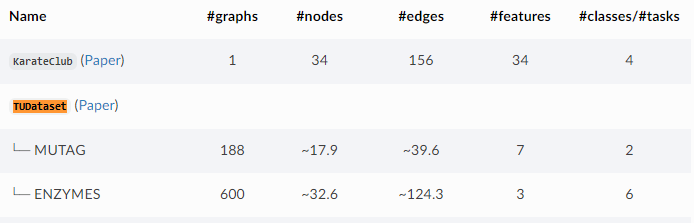

In [ ]:
# PyG의 TUDataset에서 ENZYMES 데이터 세트를 불러와 dataset으로 객체 지정

from torch_geometric.datasets import TUDataset
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

In [ ]:
len(dataset)

In [ ]:
dataset.num_classes

In [ ]:
dataset.num_node_features

In [ ]:
dataset

In [ ]:
data = dataset[0]

**Data Handling of Graphs**

A graph is used to model pairwise relations (edges) between objects (nodes). A single graph in PyG is described by an instance of torch_geometric.data.Data, which holds the following attributes by default:

PyG의 단일 그래프는 **torch_geometric.data의 인스턴스**로 설명된다. 데이터 - 기본적으로 다음 속성을 보유한다.

**data.x**: Node feature matrix with shape **[num_nodes, num_node_features]**

**data.edge_index**: Graph connectivity in COO format with shape **[2, num_edges]** and type torch.long

**data.edge_attr**: Edge feature matrix with shape **[num_edges, num_edge_features]**

**data.y**: Target to train against (may have arbitrary shape), e.g., node-level targets of shape **[num_nodes, *]** or graph-level targets of shape [1, *]

**data.pos**: Node position matrix with shape **[num_nodes, num_dimensions]**

data.face에 의해 확장하여 shape **[3, num_faces]** 및 torch.long 유형의 텐서에서 3D mesh로부터 삼각형의 연결을 저장할 수 있다.

PyTorch 및 torchvision은 이미지와 타겟의 튜플로서 예제를 정의한다. PyG에서 이 표기법을 생략한다.

In [ ]:
data

In [ ]:
#PyG 토치에서 networkx 불러오기

from torch_geometric.utils import to_networkx

In [ ]:
type(data)

In [ ]:
networkX_graph = to_networkx(data)

In [ ]:
type(networkX_graph)

In [ ]:
import networkx as nx

In [ ]:
nx.draw(networkX_graph)

In [ ]:
nx.draw(networkX_graph, with_labels = True)

## **Cora dataset**
"The **Cora dataset consists of 2708 scientific publications classified** into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words." - Papers with Code.

https://graphsandnetworks.com/the-cora-dataset/

#### **PyG에서 Cora 데이터 세트 받기**

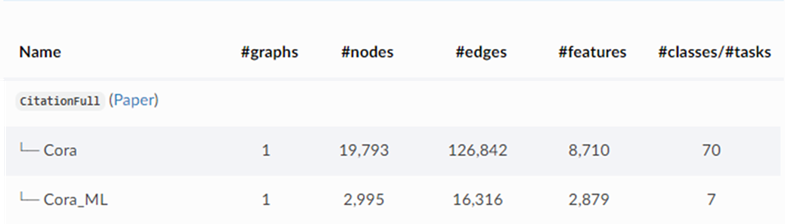

In [ ]:
from torch_geometric.datasets import Planetoid
cora_dataset = Planetoid(root='tmp/Cora', name='Cora')

In [ ]:
cora_dataset

In [ ]:
cora_dataset.len()

In [ ]:
# number of graphs
print("Number of graphs: ", len(cora_dataset))

# number of features
print("Number of features: ", cora_dataset.num_features)

# number of classes
print("Number of classes: ", cora_dataset.num_classes)

In [ ]:
c_ds = cora_dataset[0]

In [ ]:
c_ds

In [ ]:
#https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html

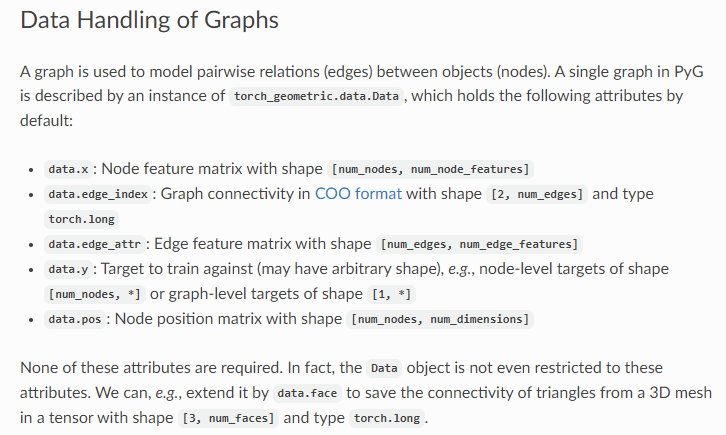

In [ ]:
# number of nodes
print("Number of nodes: ", c_ds.num_nodes)

# number of edges
print("Number of edges: ", c_ds.num_edges)

# check if directed
print("Is directed: ", c_ds.is_directed())

In [ ]:
c_ds.x[:0].shape

In [ ]:
c_ds.x[:1].shape

In [ ]:
c_ds.x[0].shape

In [ ]:
# sample nodes from the graph
print("Shape of sample nodes: ", c_ds.x[:5].shape)

In [ ]:
c_ds_5 = c_ds.x[:5]

In [ ]:
c_ds_5.shape

In [ ]:
# number of graphs
print("Number of graphs: ", len(c_ds_5))
print("Number of features: ", len(c_ds_5[0]))

In [ ]:
c_ds

In [ ]:
## train_mask=[2708], val_mask=[2708], test_mask=[2708]
## Look Above

In [ ]:
# check training nodes
print("# of nodes to train on: ", c_ds.train_mask.sum().item())
# check test nodes
print("# of nodes to test on: ", c_ds.test_mask.sum().item())
# check validation nodes
print("# of nodes to validate on: ", c_ds.val_mask.sum().item())

In [ ]:
type(c_ds)

In [ ]:
networkX_graph = to_networkx(c_ds)

In [ ]:
type(networkX_graph)

In [ ]:
nx.draw(networkX_graph)
#nx.draw(networkX_graph, with_labels = True)

In [ ]:
networkX_graph

In [ ]:
print(nx.is_weighted(networkX_graph))
print(nx.is_directed(networkX_graph))
print(networkX_graph.order())
print(networkX_graph.number_of_edges())
print(networkX_graph.number_of_nodes())
print(networkX_graph.edges)
print(networkX_graph.nodes)

In [ ]:
c_ds.x.shape

In [ ]:
c_ds.x[1734].shape

In [ ]:
c_ds_10 = c_ds.x[:10]

In [ ]:
c_ds_10.shape

In [ ]:
type(c_ds_10)

In [ ]:
c_ds

In [ ]:
# google drive에 networkX_graph를 gexf 파일로 저장

nx.write_gexf(networkX_graph, 'cora_ex.gexf')

In [ ]:
# google drive에 networkX_graph를 graphml 파일로 저장

]nx.write_graphml(networkX_graph, 'cora_ex.graphml')

# **Cora Dataset from NetworkX**

**NetworkX에서 Cora 데이터 세트 받아 Colab에 올려 실습하기**

- download cora.tgz from the link below:
  -  https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz
- upload cora.tgz to google colab

In [ ]:
# Colab에 올린 압축파일 풀기

!tar -xvf /content/cora.tgz 

In [ ]:
import os
import networkx as nx
import pandas as pd
data_dir = os.path.expanduser("/content/cora") # 압축을 푼 파일 경로

In [ ]:
edgelist = pd.read_csv(os.path.join(data_dir, "cora.cites"), sep='\t', header=None, names=["target", "source"])
edgelist["label"] = "cites"

In [ ]:
edgelist.sample(frac=1).head(10)

In [ ]:
type(edgelist)

In [ ]:
Gnx = nx.from_pandas_edgelist(edgelist, edge_attr="label")
nx.set_node_attributes(Gnx, "paper", "label")

In [ ]:
print(nx.is_weighted(Gnx))
print(nx.is_directed(Gnx))
print(Gnx.order())
print(Gnx.number_of_edges())
print(Gnx.number_of_nodes())
print(Gnx.edges)
print(Gnx.nodes)

In [ ]:
Gnx

In [ ]:
nx.draw(Gnx)

In [ ]:
Gnx.number_of_nodes()

In [ ]:
Gnx.nodes

In [ ]:
# Get the node ID from the above list
Gnx.nodes[1050679]

In [ ]:
feature_names = ["w_{}".format(ii) for ii in range(1433)]
column_names =  feature_names + ["subject"]
node_data = pd.read_csv(os.path.join(data_dir, "cora.content"), sep='\t', header=None, names=column_names)

In [ ]:
node_data

In [ ]:
set(node_data["subject"])

In [ ]:
node_data

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

In [ ]:
data = cora_dataset[0]
print(f'Dataset: {cora_dataset}:')
print('======================')
print(f'Number of graphs: {len(cora_dataset)}')
print(f'Number of features: {cora_dataset.num_features}')
print(f'Number of classes: {cora_dataset.num_classes}')

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

In [ ]:
A = nx.adjacency_matrix(Gnx)

In [ ]:
# 인접행렬

A.todense()